In [1]:
# Import Python Packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from operator import attrgetter

/Users/thaonguyen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Import the data
data = pd.read_excel("/Users/thaonguyen/Desktop/xin viec official/cty Long/CaseStudyData.xlsx")

In [3]:
data.head()

,InvoiceDate,Fiscal_Year,Ordernumber,customercode,Region,productcode,ProductName,ProductBrand,ProductPublishedDate,ProductDescription,Category,SubCategory,OldAndRareFlag,Dimensions,Weight,Sales,Units,Price
0,2021-07-01,2022,7481573,AAJ611,US,BRBON/BLA38,Blanton's Straight From the Barrel (65.15%),Blanton's,2010-01-01,A single barrel bottling at 65.1% from Blanton...,American Whiskey,American Whiskey: Bourbon,0,70cl,1.92,104.17,1.0,104.17
1,2021-07-01,2022,7481588,BBI349,US,BRBON/BLA28,Blanton's Straight From the Barrel (65.7%),Blanton's,2010-01-01,A single barrel bottling at 65.7% from Blanton...,American Whiskey,American Whiskey: Bourbon,0,70cl,1.92,104.17,1.0,104.17
2,2021-07-01,2022,7487131,BBH871,UK,ELEM/LP8,Lp8 - Elements of Islay / Madeira Cask,Laphroaig,2022-11-29,A spoonful of Madeira makes the medicine go do...,Single Malt Scotch Whisky,Single Malt Scotch Whisky: Islay,1,50cl,1.25,145.84,1.0,145.84
3,2021-07-01,2022,7487856,ALT905,UK,ABGOB.NON2,Ardbeg Uigeadail,Ardbeg,2010-01-01,A fine drop of Ardbeg bottled at cask strength...,Single Malt Scotch Whisky,Single Malt Scotch Whisky: Islay,0,70cl,2.00,49.96,1.0,49.96
4,2021-07-01,2022,7487878,BBJ422,UK,MINI/SM/ARR2,Arran 10yo Malt Miniature,Arran,2011-05-20,A miniature bottle of 10 year old whisky from ...,Miniatures,Miniatures: Single Malt Scotch Whisky,0,5cl,0.25,4.13,1.0,4.13


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328069 entries, 0 to 328068
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   InvoiceDate           328069 non-null  datetime64[ns]
 1   Fiscal_Year           328069 non-null  int64         
 2   Ordernumber           328069 non-null  int64         
 3   customercode          328069 non-null  object        
 4   Region                328069 non-null  object        
 5   productcode           328069 non-null  object        
 6   ProductName           328069 non-null  object        
 7   ProductBrand          328054 non-null  object        
 8   ProductPublishedDate  328069 non-null  datetime64[ns]
 9   ProductDescription    326801 non-null  object        
 10  Category              328069 non-null  object        
 11  SubCategory           328069 non-null  object        
 12  OldAndRareFlag        328069 non-null  int64         
 13 

In [5]:
data['Ordernumber'].nunique()

161427

In [6]:
data['customercode'].nunique()

30629

## Missing data
Due to the data information, we can see that we have some missing value in Dimensions, Units, Price, Product Brand and Product Description.

In term of filling missing data for each columns, my solutions to fill the missing data are:
+ Fill the missing price by the average (mean) of that product code in the non-missing rows
+ Calculate the missing data in Units column by Divide the sale of product to price and round them
+ For product brand, using the first letter of "Product Name" as the product brand
+ In terms of dimensions and Product Description, live the value as NaN when we can't fill the missing value

### Fill null value in price and units

In [7]:
data['Price'].fillna(data.groupby('productcode')['Price'].transform('mean'), inplace=True)
data['Units'] = (data['Sales']/data['Price']).round(0)
data

,InvoiceDate,Fiscal_Year,Ordernumber,customercode,Region,productcode,ProductName,ProductBrand,ProductPublishedDate,ProductDescription,Category,SubCategory,OldAndRareFlag,Dimensions,Weight,Sales,Units,Price
0,2021-07-01,2022,7481573,AAJ611,US,BRBON/BLA38,Blanton's Straight From the Barrel (65.15%),Blanton's,2010-01-01,A single barrel bottling at 65.1% from Blanton...,American Whiskey,American Whiskey: Bourbon,0,70cl,1.92,104.17,1.0,104.170
1,2021-07-01,2022,7481588,BBI349,US,BRBON/BLA28,Blanton's Straight From the Barrel (65.7%),Blanton's,2010-01-01,A single barrel bottling at 65.7% from Blanton...,American Whiskey,American Whiskey: Bourbon,0,70cl,1.92,104.17,1.0,104.170
2,2021-07-01,2022,7487131,BBH871,UK,ELEM/LP8,Lp8 - Elements of Islay / Madeira Cask,Laphroaig,2022-11-29,A spoonful of Madeira makes the medicine go do...,Single Malt Scotch Whisky,Single Malt Scotch Whisky: Islay,1,50cl,1.25,145.84,1.0,145.840
3,2021-07-01,2022,7487856,ALT905,UK,ABGOB.NON2,Ardbeg Uigeadail,Ardbeg,2010-01-01,A fine drop of Ardbeg bottled at cask strength...,Single Malt Scotch Whisky,Single Malt Scotch Whisky: Islay,0,70cl,2.00,49.96,1.0,49.960
4,2021-07-01,2022,7487878,BBJ422,UK,MINI/SM/ARR2,Arran 10yo Malt Miniature,Arran,2011-05-20,A miniature bottle of 10 year old whisky from ...,Miniatures,Miniatures: Single Malt Scotch Whisky,0,5cl,0.25,4.13,1.0,4.130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328064,2023-11-07,2024,8180815,AMV852,UK,VERMO/APE3,The Aperitivo Co Turin Sweet Vermouth,The Aperitivo Co,2021-11-11,A classically-styled Italian sweet vermouth fr...,Vermouths and Aperitifs,Vermouths and Aperitifs: Vermouths and Aperitifs,0,75cl,1.49,19.96,1.0,19.960
328065,2023-11-07,2024,8181345,ADD567,UK,MONIN/HAZ1,Monin Hazelnut Syrup,Monin,2011-01-05,"A marvellously nutty Monin syrup, with hints o...",Soft Drinks and Syrups,Soft Drinks and Syrups: Syrups and Purées,0,70cl,1.49,7.95,1.0,7.950
328066,2023-11-07,2024,8181346,ADF094,UK,RUM/RON1,Ron Zacapa Centenario Sistema Solera 23 Rum,Ron Zacapa,2022-02-03,An awesome rum – winner of a Platinum medal an...,Rum,Rum: Golden,0,70cl,2.00,47.46,1.0,47.460
328067,2023-11-07,2024,8181377,AAG403,UK,RUM/BAC1,Bacardi Carta Blanca Rum,Bacardi,2010-01-01,"The best-selling spirit brand worldwide, enjoy...",Rum,Rum: White,0,70cl,1.49,66.50,4.0,16.625


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328069 entries, 0 to 328068
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   InvoiceDate           328069 non-null  datetime64[ns]
 1   Fiscal_Year           328069 non-null  int64         
 2   Ordernumber           328069 non-null  int64         
 3   customercode          328069 non-null  object        
 4   Region                328069 non-null  object        
 5   productcode           328069 non-null  object        
 6   ProductName           328069 non-null  object        
 7   ProductBrand          328069 non-null  object        
 8   ProductPublishedDate  328069 non-null  datetime64[ns]
 9   ProductDescription    326801 non-null  object        
 10  Category              328069 non-null  object        
 11  SubCategory           328069 non-null  object        
 12  OldAndRareFlag        328069 non-null  int64         
 13 

In [9]:
data['ProductBrand'].fillna(data['ProductName'].str.split(' ').str[0], inplace = True)

In [60]:
#Save the data to file csv
data.to_csv('Clean_data.csv', index=False)

In [11]:
#Group by the order data to analyse
order_data = data.groupby(['customercode','Region','Ordernumber'])['Sales'].agg('sum').reset_index(['customercode','Region','Ordernumber'])
order_data

,customercode,Region,Ordernumber,Sales
0,409,UK,7495495,108.25
1,409,UK,7510928,195.83
2,409,UK,7532757,208.33
3,409,UK,7754873,62.46
4,409,UK,7827091,165.83
...,...,...,...,...
161422,WEBDK4,EU,8135824,45.63
161423,WEBDK4,EU,8143088,22.70
161424,WEBDK4,EU,8147808,57.29
161425,WEBDK4,EU,8151561,232.88


In [12]:
customer_data = order_data.groupby(['Region','customercode'])['Sales'].agg('sum').reset_index(['Region','customercode'])
customer_data['count'] = customer_data['customercode'].map(order_data['customercode'].value_counts())
customer_data['AoV'] = customer_data['Sales']/customer_data['count']
customer_data

,Region,customercode,Sales,count,AoV
0,ASIA,2591,12671.80,16,791.987500
1,ASIA,AAA060,13555.47,19,713.445789
2,ASIA,AAA240,3032.50,4,758.125000
3,ASIA,AAA280,3604.80,7,514.971429
4,ASIA,AAA327,1724.05,5,344.810000
...,...,...,...,...,...
31088,US,BOM822,826.92,3,275.640000
31089,US,BON799,2979.18,4,744.795000
31090,US,BOO480,281.84,3,93.946667
31091,US,BOP984,1453.32,3,484.440000


In [13]:
def func(row):
    if row['count'] >= 5 and row['AoV'] >= 148:
        return 'HighValue_Loyal'
    elif row['count'] >= 5 and row['AoV'] < 148:
        return 'LowValue_Loyal' 
    elif row['count'] < 5 and row['AoV'] >= 148:
        return 'HighValue_NoLoyal' 
    else:
        return 'LowValue_NoLoyal'

customer_data['customer_type'] = customer_data.apply(func, axis=1)
customer_data

,Region,customercode,Sales,count,AoV,customer_type
0,ASIA,2591,12671.80,16,791.987500,HighValue_Loyal
1,ASIA,AAA060,13555.47,19,713.445789,HighValue_Loyal
2,ASIA,AAA240,3032.50,4,758.125000,HighValue_NoLoyal
3,ASIA,AAA280,3604.80,7,514.971429,HighValue_Loyal
4,ASIA,AAA327,1724.05,5,344.810000,HighValue_Loyal
...,...,...,...,...,...,...
31088,US,BOM822,826.92,3,275.640000,HighValue_NoLoyal
31089,US,BON799,2979.18,4,744.795000,HighValue_NoLoyal
31090,US,BOO480,281.84,3,93.946667,LowValue_NoLoyal
31091,US,BOP984,1453.32,3,484.440000,HighValue_NoLoyal


In [14]:
customer_data.to_csv("customer_data1.csv", index=False)

In [15]:
customer_data['Sales'].describe()

count     31093.000000
mean       1045.430756
std        7712.407287
min           7.920000
25%         195.880000
50%         366.310000
75%         759.180000
max      828710.250000
Name: Sales, dtype: float64

In [16]:
customer_data['count'].describe()

count    31093.000000
mean         5.315634
std         12.256844
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max       1319.000000
Name: count, dtype: float64

In [17]:
customer_data['AoV'].describe()

count    31093.000000
mean       173.032525
std        647.350259
min          0.592500
25%         53.210000
50%         89.552500
75%        148.710000
max      55205.000000
Name: AoV, dtype: float64

In [18]:
import numpy as np
np.percentile(customer_data['count'], 90)

9.0

In [19]:
np.percentile(customer_data['Sales'], 95)

3019.211999999998

In [20]:
np.percentile(customer_data['AoV'], 90)

295.65915501519754

In [21]:
order_data_region = order_data.groupby('Region')['Sales'].agg(['count','sum']).reset_index()
order_data_region['AoV'] = order_data_region['sum']/order_data_region['count']
order_data_region

,Region,count,sum,AoV
0,ASIA,8512,5782294.69,679.310936
1,EU,4209,2019098.00,479.709670
2,ROW,1258,583348.77,463.711264
3,UK,139655,20006300.41,143.255167
4,US,7793,4114536.62,527.978522


In [22]:
returner = order_data.groupby(['Region','customercode'])['Ordernumber'].agg('count').reset_index(name = 'number_purchase')
returner

,Region,customercode,number_purchase
0,ASIA,2591,16
1,ASIA,AAA060,19
2,ASIA,AAA240,2
3,ASIA,AAA280,7
4,ASIA,AAA327,5
...,...,...,...
31088,US,BOM822,3
31089,US,BON799,4
31090,US,BOO480,3
31091,US,BOP984,3


In [23]:
returner1 = returner.groupby('Region')['number_purchase'].agg('sum').reset_index(name = 'total')
returner1

,Region,total
0,ASIA,8512
1,EU,4209
2,ROW,1258
3,UK,139655
4,US,7793


In [24]:
returner2 = returner.groupby('Region')['customercode'].agg('count').reset_index(name = 'customer_total')
returner2

,Region,customer_total
0,ASIA,1504
1,EU,411
2,ROW,275
3,UK,27198
4,US,1705


In [25]:
returner1['Average_return'] = returner1['total']/returner2['customer_total']
returner1

,Region,total,Average_return
0,ASIA,8512,5.659574
1,EU,4209,10.240876
2,ROW,1258,4.574545
3,UK,139655,5.134753
4,US,7793,4.570674


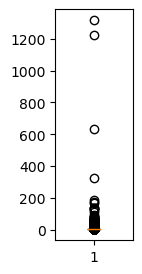

In [26]:
fig = plt.figure(figsize =(1, 3))
plt.boxplot(returner['number_purchase'])
plt.show()

In [27]:
returner['number_purchase'].describe()

count    31093.000000
mean         5.191747
std         12.038398
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max       1319.000000
Name: number_purchase, dtype: float64

In [28]:
product_data = data.groupby(['productcode','Dimensions' ])['Ordernumber'].agg('count').reset_index(['productcode','Dimensions'])
product_data

,productcode,Dimensions,Ordernumber
0,ABFCOP2015,70cl,1
1,ABFFF.15YO,70cl,3
2,ABFFF.15YOV1,70cl,1
3,ABFFF.1980,70cl,1
4,ABFGLM2005,70cl,2
...,...,...,...
18382,WINE/ZEP2020,75cl,10
18383,WINE/ZEP2022,75cl,6
18384,WINE/ZIN2018,75cl,10
18385,WINE/ZUS2016,75cl,3


In [29]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18387 entries, 0 to 18386
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   productcode  18387 non-null  object
 1   Dimensions   18387 non-null  object
 2   Ordernumber  18387 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 431.1+ KB


In [30]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')
data['order_quarter'] = data['InvoiceDate'].dt.to_period('Q')
data['cohort'] = data.groupby('customercode')['InvoiceDate'].transform('min').dt.to_period('Q')

In [31]:

data_cohort = data.groupby(['cohort', 'order_quarter']).agg(n_customers=('customercode', 'nunique')).reset_index(drop=False)
data_cohort['period_number'] = (data_cohort['order_quarter'] - data_cohort['cohort']).apply(attrgetter('n'))
data_cohort

,cohort,order_quarter,n_customers,period_number
0,2021Q3,2021Q3,10488,0
1,2021Q3,2021Q4,6523,1
2,2021Q3,2022Q1,3949,2
3,2021Q3,2022Q2,3947,3
4,2021Q3,2022Q3,4218,4
5,2021Q3,2022Q4,4724,5
6,2021Q3,2023Q1,3037,6
7,2021Q3,2023Q2,2880,7
8,2021Q3,2023Q3,3161,8
9,2021Q3,2023Q4,1439,9


### Visualise the cohort: customer retention

In [32]:
cohort_pivot = data_cohort.pivot_table(index='cohort', columns='period_number', values='n_customers')
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

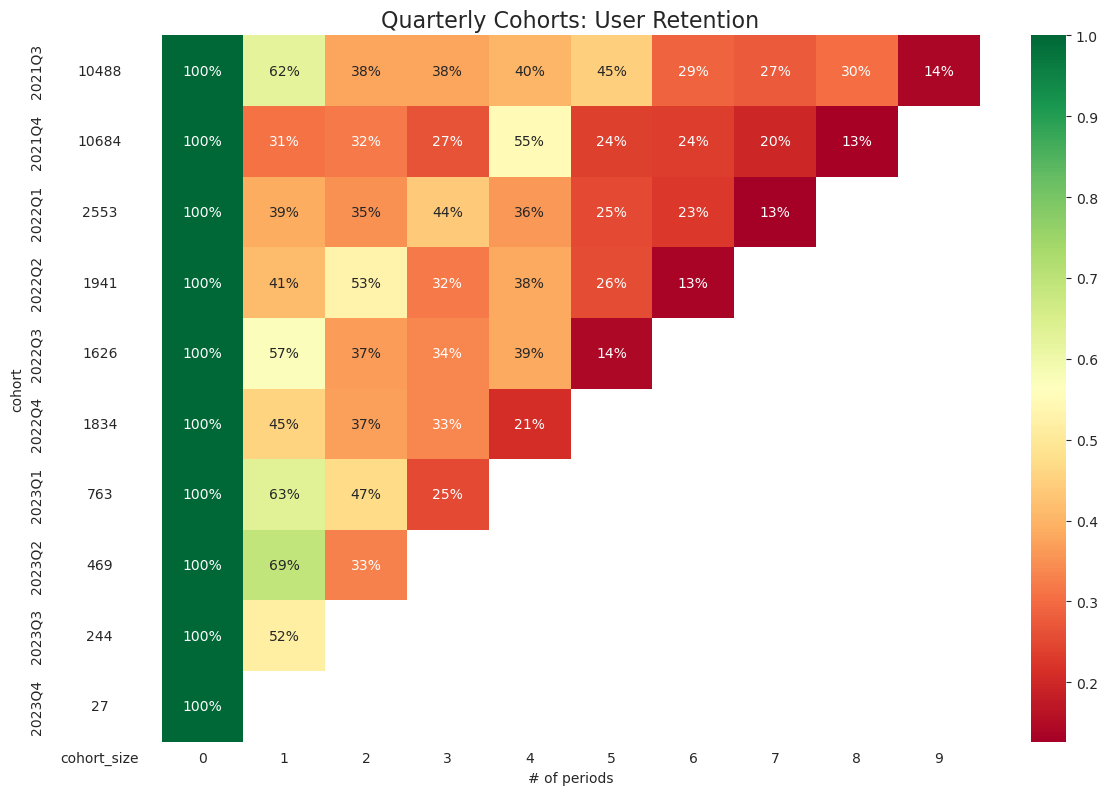

In [33]:


with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Quarterly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

# Machine learning model to recommend product for exisiting customer

In [34]:
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from gensim.models import Word2Vec 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings;
warnings.filterwarnings('ignore')

In [35]:
df = data[['customercode', 'Ordernumber', 'Units','OldAndRareFlag','productcode','ProductDescription','ProductName','InvoiceDate','Region', 'Price']]
df

,customercode,Ordernumber,Units,OldAndRareFlag,productcode,ProductDescription,ProductName,InvoiceDate,Region,Price
0,AAJ611,7481573,1.0,0,BRBON/BLA38,A single barrel bottling at 65.1% from Blanton...,Blanton's Straight From the Barrel (65.15%),2021-07-01,US,104.170
1,BBI349,7481588,1.0,0,BRBON/BLA28,A single barrel bottling at 65.7% from Blanton...,Blanton's Straight From the Barrel (65.7%),2021-07-01,US,104.170
2,BBH871,7487131,1.0,1,ELEM/LP8,A spoonful of Madeira makes the medicine go do...,Lp8 - Elements of Islay / Madeira Cask,2021-07-01,UK,145.840
3,ALT905,7487856,1.0,0,ABGOB.NON2,A fine drop of Ardbeg bottled at cask strength...,Ardbeg Uigeadail,2021-07-01,UK,49.960
4,BBJ422,7487878,1.0,0,MINI/SM/ARR2,A miniature bottle of 10 year old whisky from ...,Arran 10yo Malt Miniature,2021-07-01,UK,4.130
...,...,...,...,...,...,...,...,...,...,...
328064,AMV852,8180815,1.0,0,VERMO/APE3,A classically-styled Italian sweet vermouth fr...,The Aperitivo Co Turin Sweet Vermouth,2023-11-07,UK,19.960
328065,ADD567,8181345,1.0,0,MONIN/HAZ1,"A marvellously nutty Monin syrup, with hints o...",Monin Hazelnut Syrup,2023-11-07,UK,7.950
328066,ADF094,8181346,1.0,0,RUM/RON1,An awesome rum – winner of a Platinum medal an...,Ron Zacapa Centenario Sistema Solera 23 Rum,2023-11-07,UK,47.460
328067,AAG403,8181377,4.0,0,RUM/BAC1,"The best-selling spirit brand worldwide, enjoy...",Bacardi Carta Blanca Rum,2023-11-07,UK,16.625


In [36]:
# remove missing values
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326801 entries, 0 to 328068
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   customercode        326801 non-null  object        
 1   Ordernumber         326801 non-null  int64         
 2   Units               326801 non-null  float64       
 3   OldAndRareFlag      326801 non-null  int64         
 4   productcode         326801 non-null  object        
 5   ProductDescription  326801 non-null  object        
 6   ProductName         326801 non-null  object        
 7   InvoiceDate         326801 non-null  datetime64[ns]
 8   Region              326801 non-null  object        
 9   Price               326801 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 27.4+ MB


In [37]:
customers = df["customercode"].unique().tolist()
len(customers)

30628

In [38]:
random.shuffle(customers)

# extract 90% of customer ID's
customers_train = [customers[i] for i in range(round(0.9*len(customers)))]

# split data into train and validation set
train_df = df[df['customercode'].isin(customers_train)]
validation_df = df[~df['customercode'].isin(customers_train)]

In [39]:
# list to capture purchase history of the customers
purchases_train = []

# populate the list with the product codes
for i in tqdm(customers_train):
    temp = train_df[train_df["customercode"] == i]["productcode"].tolist()
    purchases_train.append(temp)

100%|█████████████████████████████████████| 27565/27565 [07:31<00:00, 61.11it/s]


In [40]:
purchases_val = []
customer_code = {}
        
# populate the list with the product codes
for customer_id in tqdm(validation_df['customercode'].unique()):
    temp = validation_df[validation_df["customercode"] == customer_id]["productcode"].tolist()
    purchases_val.append(temp)
    if customer_id not in customer_code:
        customer_code[customer_id] = []
    customer_code[customer_id].append(validation_df[validation_df['customercode'] == customer_id]['productcode'].tolist())

100%|██████████████████████████████████████| 3063/3063 [00:11<00:00, 264.22it/s]


In [41]:
for key, value in customer_code.items():
    flattened_products = [product for sublist in value for product in sublist]
    customer_code[key] = flattened_products

print(customer_code)

{'AXG733': ['LRGOB.16YOV1', 'SPROB.10YO', 'ARROB.1996V10', 'PM/ARROB.1996V11', 'ABGOB.19YOV2', 'PM/ARROB.1996V10', 'GMGOB.13YO', 'LKWFF.12YO', 'KLKOB.16YO', 'BNVOB.NON2', 'BLAFF.12YO', 'GMGOB.NON55', 'DLNFF.16YO', 'ARROB.21YOV1', 'GLEOB.10YOV6', 'LRGOB.10YOV84', 'JAPAN/CHI33', 'ABGOB.19YOV3', 'CRGOB.13YOV1', 'LRGOB.10YOV91', 'CLYTWE2011V1', 'KLKOB.NON18', 'GFDOB.NON80', 'HAZOB.10YOV1', 'VATTED/CAM1', 'HAZOB.2010', 'KLKOB.NON19', 'KLKOB.12YO', 'VATTED/BIG30'], 'ARV691': ['SETS/PM/21YO', 'MINI/RUM/KRA1', 'MINI/SM/CRG13YO', 'LRGOB.16YOV1', 'LRGOB.10YOV79', 'MINI/SM/GLE15YO', 'ARROB.1996V11', 'VODKA/CIR33', 'DALOB.2006', 'PM/BLBOB.2005V4', 'VODKA/CIR20', 'EDROB.2012', 'GRAIN/COM10', 'VATTED/COM44'], 'ABZ260': ['GIN/TAN1', 'BRBON/MAK1', 'VERMO/CIN40', 'VERMO/CAM1', 'GIN/TAN1', 'VERMO/CAM1', 'BRUOB.NON23', 'BOWOB.15YOV3', 'VERMO/COC2', 'VERMO/CAM1', 'GIN/TAN1', 'GIN/TAN1', 'VERMO/CAM1', 'LIQ/KAH1', 'VERMO/CIN40', 'BRBON/MAK1', 'RUM/HAV2', 'SOFT/TAN1', 'SOFT/FEV6', 'BRUOB.NON23', 'GIN/BEE1', 

### Build word2vec Embeddings for Products

In [43]:
# train word2vec model
model = Word2Vec(window = 10, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

model.build_vocab(purchases_train, progress_per=200)

model.train(purchases_train, total_examples = model.corpus_count, 
            epochs=10, report_delay=1)

(2775546, 2958190)

In [44]:
# save word2vec model
model.save("word2vec_2.model")

In [45]:
model.init_sims(replace=True)
print(model)

Word2Vec(vocab=9566, vector_size=100, alpha=0.03)


In [46]:
model.init_sims(replace=True)
X = model.wv.vectors
vocabulary = model.wv.index_to_key

In [47]:
products = train_df[["productcode", "ProductName"]]

# remove duplicates
products.drop_duplicates(inplace=True, subset='productcode', keep="last")

# create product-ID and product-description dictionary
products_dict = products.groupby('productcode')['ProductName'].apply(list).to_dict()

In [48]:
products_dict['ELEM/LP8']

['Lp8 - Elements of Islay / Madeira Cask']

In [50]:
def similar_products(v, n = 6):
    
    # extract most similar products for the input vector
    ms = model.wv.similar_by_vector(v, topn= n+1)[1:]
    
    # extract name and similarity score of the similar products
    new_ms = []
    for j in ms:
        pair = (products_dict[j[0]][0], j[1])
        new_ms.append(pair)
        
    return new_ms  

In [51]:
# similar_products('VERMO/APE3')

similar_products(model.wv['VERMO/APE3'])

[('Fee Brothers Celery Bitters', 0.6872725486755371),
 ('Monin Basil', 0.6848461627960205),
 ('Karminia Rosso Vermouth di Torino', 0.6772699356079102),
 ('El Bandara Al Fresco Aperitif', 0.6681668162345886),
 ('Batanga Tequila Duo / 2 Bottles', 0.6666544079780579),
 ('Bach Highball / Crystal / Luigi Bormioli', 0.6608810424804688)]

In [52]:
def aggregate_vectors(products):
    product_vec = []
    for i in products:
        try:
            product_vec.append(model.wv[i])
        except KeyError:
            continue
        
    return np.mean(product_vec, axis=0)

In [57]:
customer_code

{'AXG733': ['LRGOB.16YOV1',
  'SPROB.10YO',
  'ARROB.1996V10',
  'PM/ARROB.1996V11',
  'ABGOB.19YOV2',
  'PM/ARROB.1996V10',
  'GMGOB.13YO',
  'LKWFF.12YO',
  'KLKOB.16YO',
  'BNVOB.NON2',
  'BLAFF.12YO',
  'GMGOB.NON55',
  'DLNFF.16YO',
  'ARROB.21YOV1',
  'GLEOB.10YOV6',
  'LRGOB.10YOV84',
  'JAPAN/CHI33',
  'ABGOB.19YOV3',
  'CRGOB.13YOV1',
  'LRGOB.10YOV91',
  'CLYTWE2011V1',
  'KLKOB.NON18',
  'GFDOB.NON80',
  'HAZOB.10YOV1',
  'VATTED/CAM1',
  'HAZOB.2010',
  'KLKOB.NON19',
  'KLKOB.12YO',
  'VATTED/BIG30'],
 'ARV691': ['SETS/PM/21YO',
  'MINI/RUM/KRA1',
  'MINI/SM/CRG13YO',
  'LRGOB.16YOV1',
  'LRGOB.10YOV79',
  'MINI/SM/GLE15YO',
  'ARROB.1996V11',
  'VODKA/CIR33',
  'DALOB.2006',
  'PM/BLBOB.2005V4',
  'VODKA/CIR20',
  'EDROB.2012',
  'GRAIN/COM10',
  'VATTED/COM44'],
 'ABZ260': ['GIN/TAN1',
  'BRBON/MAK1',
  'VERMO/CIN40',
  'VERMO/CAM1',
  'GIN/TAN1',
  'VERMO/CAM1',
  'BRUOB.NON23',
  'BOWOB.15YOV3',
  'VERMO/COC2',
  'VERMO/CAM1',
  'GIN/TAN1',
  'GIN/TAN1',
  'VERMO/CAM1'

In [59]:
similar_products(aggregate_vectors(customer_code['AAD612']))

[("Re'al Cream of Coconut", 0.9417122006416321),
 ('Monin Orange Syrup', 0.9389959573745728),
 ('Monin Chestnut (Chataigne)', 0.9386228919029236),
 ('Monin Blueberry Puree / Litre', 0.9351627826690674),
 ('Monin Lemon Syrup', 0.9346762895584106),
 ('Monin Strawberry BonBon Syrup', 0.9336432814598083)]